# **MIRIAD dataset**

**The Minimal Interval Resonance Imaging in Alzheimer's Disease (MIRIAD)** dataset is a series of longitudinal volumetric T1 MRI scans of 46 mild-moderate Alzheimer's subjects and 23 controls. It is made available for researchers to develop, validate and compare techniques, particularly for measurement of longitudinal volume change in serially acquired MR.

[Link to dataset](http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/app/template/XDATScreen_report_xnat_projectData.vm/search_element/xnat:projectData/search_field/xnat:projectData.ID/search_value/MIRIAD)   

### Data
  - Subject 
  - Label
  - Gender
  - MMSE
  - Group (AD or HC)
  - Sumbox
  - Rating
  - MRI

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

### Load files

In [19]:
subjects = pd.read_csv("miriad_subjects.csv")
subjects.head()

,Subject,Gender,Hand,YOB,Education,Ses,MR Count,Group
0,miriad_188,male,NaN,NaN,NaN,NaN,11,AD
1,miriad_189,male,NaN,NaN,NaN,NaN,12,AD
2,miriad_190,male,NaN,NaN,NaN,NaN,8,AD
3,miriad_191,female,NaN,NaN,NaN,NaN,12,AD
4,miriad_192,male,NaN,NaN,NaN,NaN,11,AD


In [20]:
assessments = pd.read_csv("miriad_assessments.csv")
assessments.head()

,id,Label,Subject,Gender,MMSE,memory,orientation,judgment_problem_solving,community_affairs,home_hobbies,personal_care,sumbox,rating
0,/@WEBAPP/images/r.gif,miriad_255_1_MMSE,miriad_255,female,18,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
1,/@WEBAPP/images/r.gif,miriad_234_7_MMSE,miriad_234,male,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/@WEBAPP/images/r.gif,miriad_222_7_MMSE,miriad_222,female,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/@WEBAPP/images/r.gif,miriad_254_7_MMSE,miriad_254,female,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/@WEBAPP/images/r.gif,miriad_218_9_MMSE,miriad_218,female,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
groups = subjects["Group"].value_counts().index
number_patients = subjects["Group"].value_counts().values

print(f"There are {number_patients[0]} patiens with {groups[0]} ")
print(f"There are {number_patients[1]} patiens with {groups[1]} ")

There are 46 patiens with AD 
There are 23 patiens with Control 


### Preprocessing

In [23]:
# Merge both subjects and assessments dataframes
merged_df = subjects.merge(assessments, on="Subject", how = 'inner')
merged_df.head(10)

,Subject,Gender_x,Hand,YOB,Education,Ses,MR Count,Group,id,Label,Gender_y,MMSE,memory,orientation,judgment_problem_solving,community_affairs,home_hobbies,personal_care,sumbox,rating
0,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_9_MMSE,male,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_5_MMSE,male,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_7_MMSE,male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_1_MMSE,male,19,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0
4,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_9_MMSE,male,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_5_MMSE,male,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_10_MMSE,male,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_1_MMSE,male,18,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0
8,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_7_MMSE,male,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,miriad_190,male,NaN,NaN,NaN,NaN,8,AD,/@WEBAPP/images/r.gif,miriad_190_5_MMSE,male,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Sort merged dataframe by label
merged_df = merged_df.sort_values(by=['Label']).reset_index(drop=True)
merged_df.head(10)

,Subject,Gender_x,Hand,YOB,Education,Ses,MR Count,Group,id,Label,Gender_y,MMSE,memory,orientation,judgment_problem_solving,community_affairs,home_hobbies,personal_care,sumbox,rating
0,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_1_MMSE,male,19,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0
1,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_5_MMSE,male,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_7_MMSE,male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,miriad_188,male,NaN,NaN,NaN,NaN,11,AD,/@WEBAPP/images/r.gif,miriad_188_9_MMSE,male,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_10_MMSE,male,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_1_MMSE,male,18,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0
6,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_5_MMSE,male,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_7_MMSE,male,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,miriad_189,male,NaN,NaN,NaN,NaN,12,AD,/@WEBAPP/images/r.gif,miriad_189_9_MMSE,male,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,miriad_190,male,NaN,NaN,NaN,NaN,8,AD,/@WEBAPP/images/r.gif,miriad_190_1_MMSE,male,20,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0


In [26]:
# Extract new dataframe with columns "Subject","Label","Group","MMSE"
small_df = merged_df[["Subject","Label","Group","MMSE"]]
small_df.head(10)

,Subject,Label,Group,MMSE
0,miriad_188,miriad_188_1_MMSE,AD,19
1,miriad_188,miriad_188_5_MMSE,AD,15
2,miriad_188,miriad_188_7_MMSE,AD,16
3,miriad_188,miriad_188_9_MMSE,AD,10
4,miriad_189,miriad_189_10_MMSE,AD,17
5,miriad_189,miriad_189_1_MMSE,AD,18
6,miriad_189,miriad_189_5_MMSE,AD,13
7,miriad_189,miriad_189_7_MMSE,AD,12
8,miriad_189,miriad_189_9_MMSE,AD,21
9,miriad_190,miriad_190_1_MMSE,AD,20


miriad_188


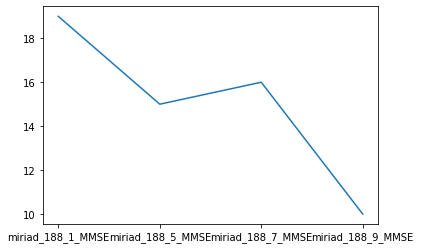

In [27]:
count = 0
for subject, group in small_df .groupby(["Subject"]):
    print(subject)
    if group["Group"].all() == "AD":
        plt.plot(group["Label"],group["MMSE"])
        count += 1
    if count == 1:
        break

### Open neuroimages

In [30]:
import os

In [118]:
path = "MIRIAD_database/miriad/"
label = "miriad_189_AD_M"
images = []
titles = []

In [119]:
sorted(os.listdir(path+label))

['.DS_Store',
 'miriad_189_AD_M_01_MR_1',
 'miriad_189_AD_M_01_MR_2',
 'miriad_189_AD_M_02_MR_1',
 'miriad_189_AD_M_03_MR_1',
 'miriad_189_AD_M_03_MR_2',
 'miriad_189_AD_M_04_MR_1',
 'miriad_189_AD_M_05_MR_1',
 'miriad_189_AD_M_06_MR_1',
 'miriad_189_AD_M_06_MR_2',
 'miriad_189_AD_M_07_MR_1',
 'miriad_189_AD_M_09_MR_1',
 'miriad_189_AD_M_10_MR_1']

In [120]:
for labels in os.listdir(path):
    if labels == label:
        for labels in sorted(os.listdir(path+label)):
            if os.path.isdir(path+label+r'/'+labels):
                for image_file in os.listdir(path+label+r'/'+labels):
                    image = nib.load(path+label+r'/'+labels+r'/'+image_file)
                
                images.append(image)             
                titles.append(image_file)

In [121]:
def axial_plot(nii_img_data, title, length = 180):
    """ Function to display axial view of a NII image"""
    fig, axes = plt.subplots(figsize=(10,8))
    axes.imshow(nii_img_data[:, length, :].T, cmap="twilight", origin="lower")
    axes.set_title(title)

ValueError: '' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

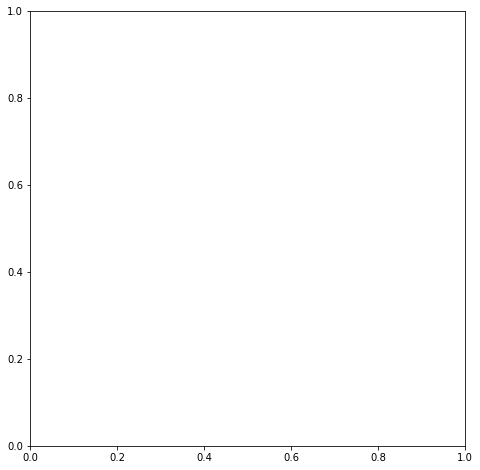

In [114]:
for index,image in enumerate(images):
    image_data = image.get_fdata()
    #print(image_data.shape)
    if index == 0 or index == len(images)-4:
        axial_plot(image_data, titles[index])

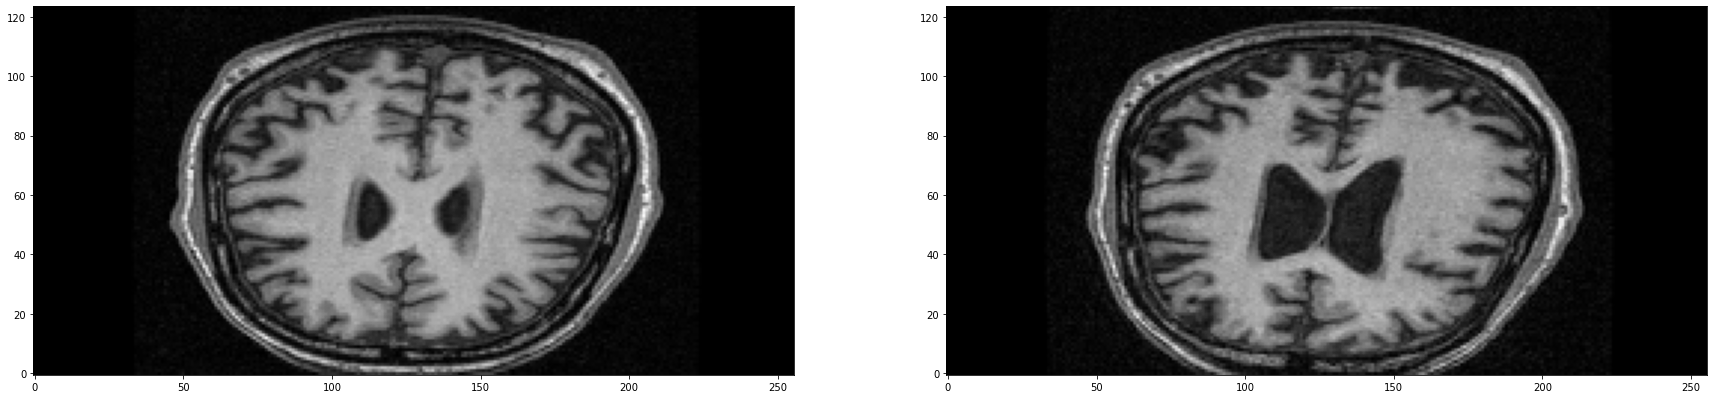

In [151]:
fig, axes = plt.subplots(1,2,figsize=(30,26))
axes[0].imshow(images[0].get_fdata()[:, 160, :].T, cmap="gray", origin="lower")
axes[1].imshow(images[-1].get_fdata()[:, 160, :].T, cmap="gray", origin="lower")

In [147]:
images[0].affine

array([[  -0.9375,    0.    ,    0.    ,  120.    ],
       [   0.    ,    0.    ,   -1.5   ,   85.    ],
       [   0.    ,    0.9375,    0.    , -129.5625],
       [   0.    ,    0.    ,    0.    ,    1.    ]])

In [148]:
images[9].affine

array([[  -0.9375    ,    0.        ,    0.        ,  120.        ],
       [   0.        ,    0.        ,   -1.5       ,   80.30000305],
       [   0.        ,    0.9375    ,    0.        , -127.76249695],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

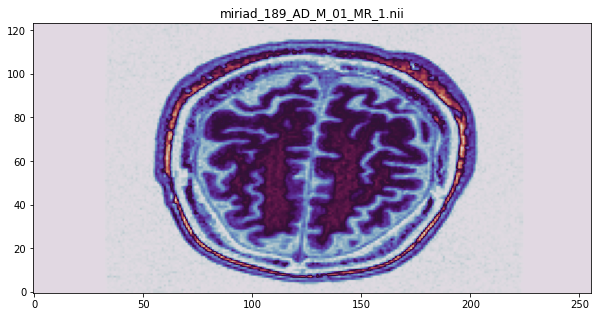

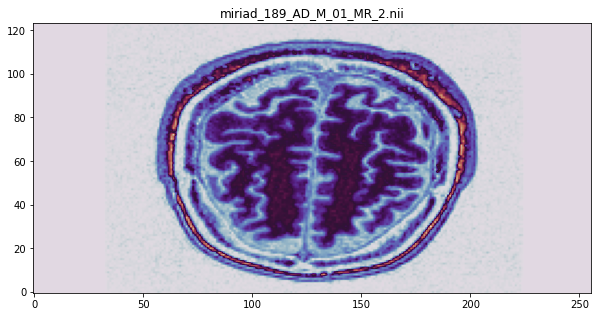

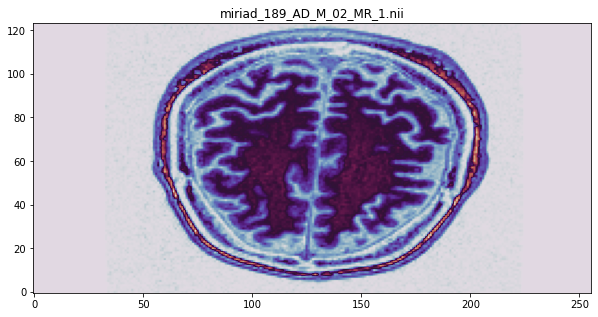

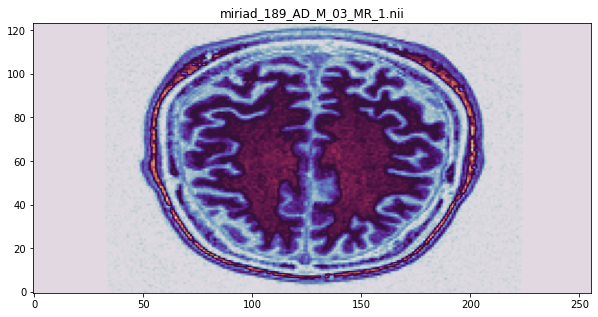

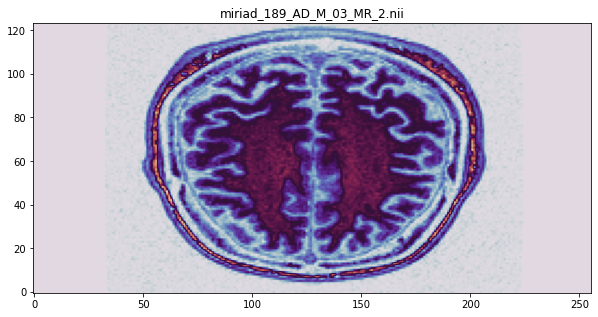

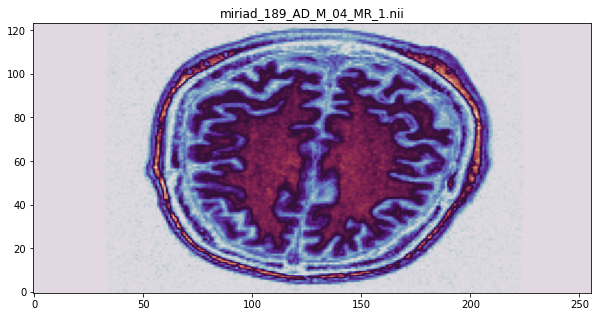

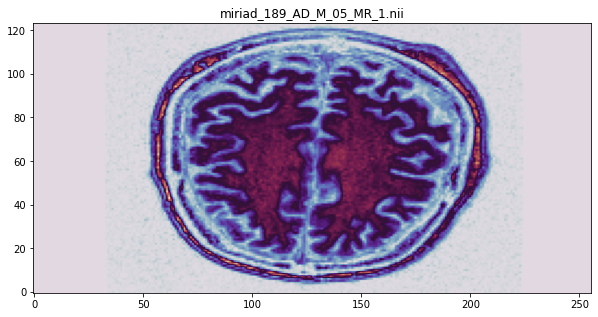

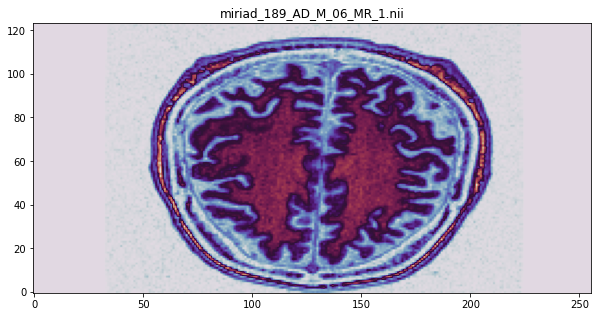

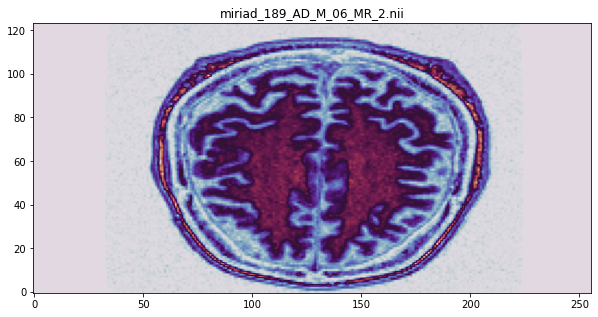

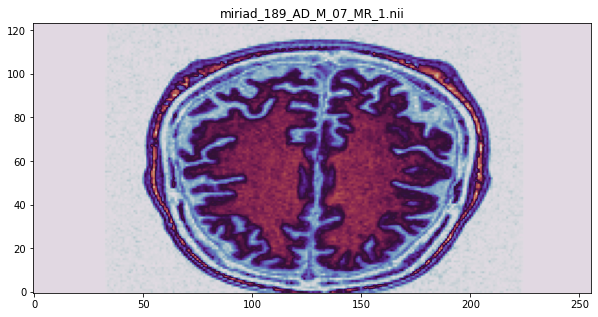

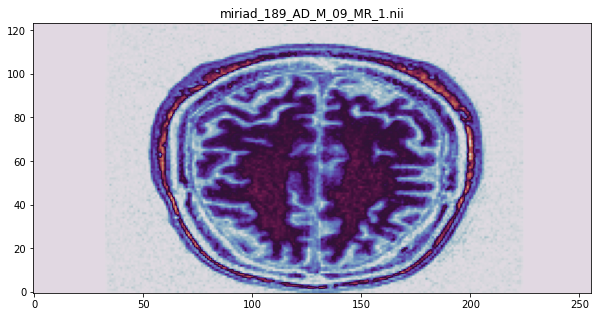

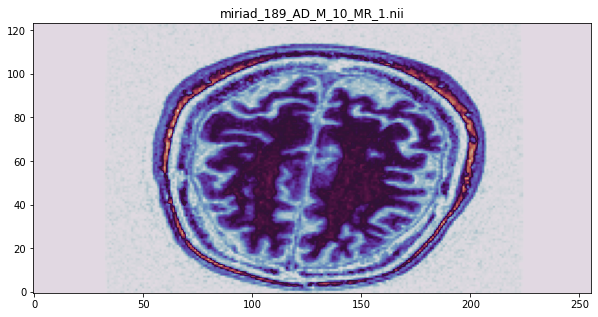

In [122]:
def axial_plot(nii_img_data, title, length = 180):
    """ Function to display axial view of a NII image"""
    fig, axes = plt.subplots(figsize=(10,8))
    axes.imshow(nii_img_data[:, length, :].T, cmap="twilight", origin="lower")
    axes.set_title(title)

def double_axial_plot(nii_img_data, title, length = 180):
    """ Function to display axial view of a NII image"""
    fig, axes = plt.subplots(figsize=(10,8))
    axes.imshow(nii_img_data[:, length, :].T, cmap="twilight", origin="lower")
    axes.set_title(title)



fig, axes = plt.subplots(1,2,figsize=(10,8))
axes[0].imshow(images[0].get_fdata()[:, length, :].T, cmap="twilight", origin="lower")
axes[1].imshow(images[len(images)-1].get_fdata()[:, length, :].T, cmap="twilight", origin="lower")

images[0].get_fdata()
images[len(images)-1].get_fdata()

for index,image in enumerate(images):
    image_data = image.get_fdata()
    axial_plot(image_data, titles[index])
    if index == 0 or index == len(images)-1:
        double_axial_plot(image_data, titles[index])

https://stackoverflow.com/questions/64674612/how-to-resize-a-nifti-nii-gz-medical-image-file  
https://www.kaggle.com/mechaman/resizing-reshaping-and-resampling-nifti-files

In [ ]:
# coregistration and normalization
anat_img = ni.load_image('anatomical.nii')
func_img = ni.load_image('epi4d.nii')
template = ni.load_image('mni152T1.nii')

# coreg
coreger = ni.interfaces.fsl.flirt(tol=0.2)
coreg_cmap = coreger.run(fixed=func_img, moving=anat_img)
c_anat_img = ni.Image(anat_img.data, coreg_cmap.compose_with(anat_img.cmap))

# calculate normalization parameters
template_cmap = template.coordmap
template_dims = template.data.shape
c_anat_cmap = c_anat_img.coordmap
normalizer = ni.interfaces.fsl.fnirt(param=3)
norm_cmap = normalizer.run(moving=template, fixed=c_anat_img)

# resample anatomical using calculated coordinate map
full_cmap = norm_cmap.composed_with(template_cmap)
w_anat_data = img.resliced_to_grid(full_cmap, template_dims)
w_anat_img = ni.Image(w_anat_data, template.coordmap)

# resample functionals with calculated coordinate map
w_func_list = []
for img in ni.image_list(func_img, axis=3):
    w_img_data = img.resliced_to_grid(full_cmap, template_dims)
    w_func_list.append(ni.Image(w_img_data, template_cmap))
ni.save(ni.list_to_image(w_func_list), 'stsome4d.nii')

In [55]:
import gzip

In [57]:
gzip(image)

TypeError: 'module' object is not callable

In [61]:
nib.save(image, 'my_image.nii.gz')

In [2]:
image = nib.load("ADNI_127_S_1427_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080220144226399_S37933_I91126.nii")

In [62]:
image_2 = nib.load("my_image.nii.gz")

In [65]:
image_3 = nib.load("ADNI_035_S_0555_MR_Field_Mapping__br_raw_20180215140443888_50_S659828_I964916.nii")

In [66]:
image_3.get_fdata().shape

(78, 78, 54, 1)

In [63]:
image_2.get_fdata().shape

(256, 256, 166)

In [6]:
image.get_fdata().shape

(256, 256, 166)

In [68]:
def axial_plot(nii_img_data, title, length = 180):
    """ Function to display axial view of a NII image"""
    fig, axes = plt.subplots(figsize=(10,8))
    axes.imshow(nii_img_data[70,:, :,:].T, cmap="gray", origin="lower")
    axes.set_title(title)

TypeError: Invalid shape (1, 54, 78) for image data

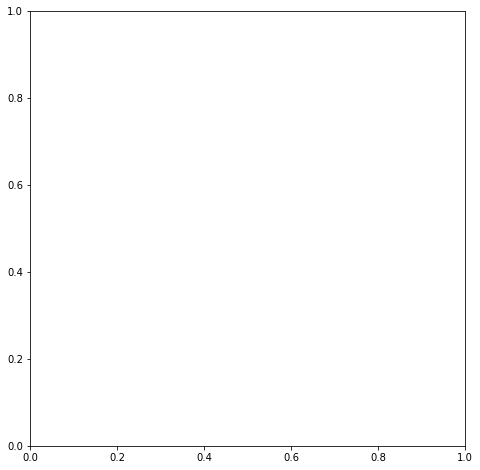

In [69]:
axial_plot(image_3.get_fdata(),"title")

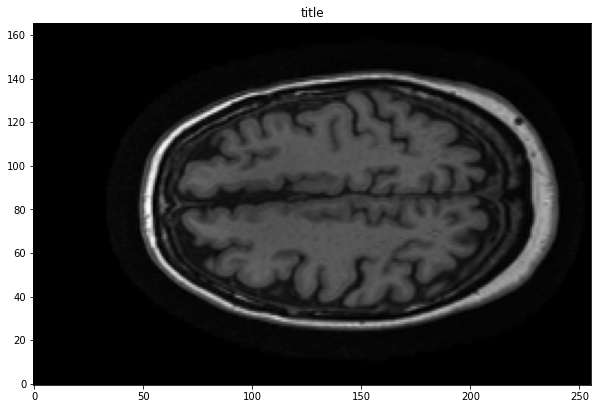

In [53]:
axial_plot(image.get_fdata(),"title")

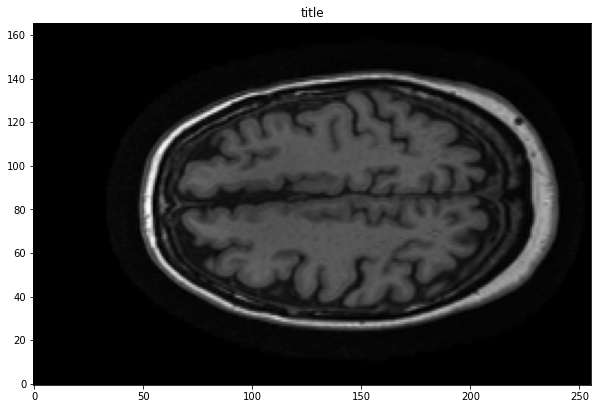

In [64]:
axial_plot(image_2.get_fdata(),"title")

In [ ]:
def get_images(directory):
    
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3

        if os.path.isdir(directory+labels):
            for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
                image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
                image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
                Images.append(image)
                Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [130]:
grouped.at[0,'Label']='new value'
grouped

,Subject,Label,Group,MMSE
0,miriad_188,new value,AD,19
1,miriad_188,miriad_188_5_MMSE,AD,15
2,miriad_188,miriad_188_7_MMSE,AD,16
3,miriad_188,miriad_188_9_MMSE,AD,10
4,miriad_189,miriad_189_10_MMSE,AD,17
...,...,...,...,...
263,miriad_257,miriad_257_10_MMSE,AD,13
264,miriad_257,miriad_257_1_MMSE,AD,17
265,miriad_257,miriad_257_5_MMSE,AD,18
266,miriad_257,miriad_257_7_MMSE,AD,20
